CLUSTER

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [ ]:
iris = pd.read_csv("https://raw.githubusercontent.com/GibranHamrouniCases/GibranHamrouniCases.github.io/main/F1_Tyres_Red_Num.csv")

In [ ]:
iris_data = iris.iloc[:, 1:56].to_numpy()
X,y  = iris_data, iris.Ranking

In [ ]:
est = KMeans(n_clusters=10)
clusters = est.fit_predict(iris_data)
est.cluster_centers_.shape

(10, 55)

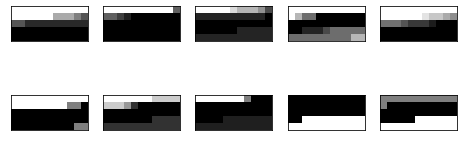

In [ ]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((5, 11)), cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = clusters == i
    labels[mask] = mode(iris.Ranking[mask])[0]

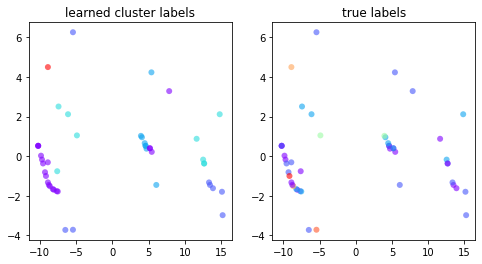

In [ ]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(iris_data)

kwargs = dict(cmap=plt.cm.get_cmap("rainbow", 10), edgecolor="none", alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title("learned cluster labels")

ax[1].scatter(X[:, 0], X[:, 1], c=iris.Ranking, **kwargs)
ax[1].set_title("true labels");

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(iris.Ranking, labels)

0.3695652173913043

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(max_depth=11)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

In [ ]:
metrics.accuracy_score(ypred, ytest)

0.16666666666666666

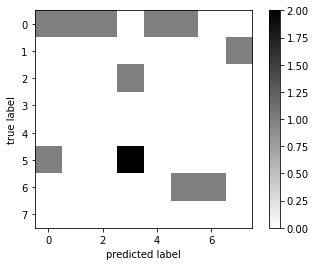

In [ ]:
plt.imshow(metrics.confusion_matrix(ypred, ytest),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");